## Introduction ot Regression with Neural Networks in TensorFlow

There are many defination for a regression problme but in ur case,

**we're going to simplify it:**

  predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

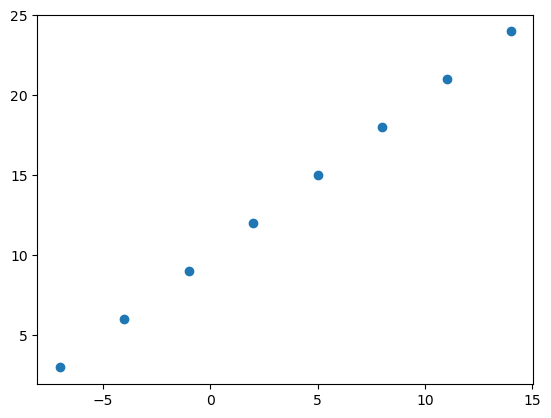

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# create feature

X=np.array([-7,-4,-1,2,5,8,11,14])

# create label
y=np.array([3,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


# Input and Output

In [3]:

housing_info=tf.constant(["breedroom","bathroom","garage"])

housing_price=tf.constant([93400])



In [4]:
# Turn x and y to Tensor

X=tf.constant(X,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modelling with Tenserflow 🏛️

1. createa a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. compile a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. fitting a model - letting the model try to find patterns between X & y (features and labels).

4. evaluate a model - how well the model is doing.

In [5]:
# set random seed

tf.random.set_seed(42)

# 1. create a model using sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden Layer
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(),
              loss=tf.keras.losses.mae, # mean absolute error,
              metrics=["mae"]
              )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated to expand dims

Epoch 1/5


2023-07-14 14:18:40.986285: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 226ms/step - loss: 17.9990 - mae: 17.9990
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 17.7177 - mae: 17.7177
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 17.4365 - mae: 17.4365
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 17.1552 - mae: 17.1552
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 16.8740 - mae: 16.8740


In [6]:
# check out X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
# Try to make prediction

model.predict([20])


1/1 [==============================] - 0s 51ms/step


array([[-14.7086525]], dtype=float32)

## Improving the Model

we can improve  our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [8]:
# lets rebuild the model

# 1. create the model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (longer Time)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated to expand dims


Epoch 1/100
1/1 [==============================] - 0s 129ms/step - loss: 9.9916 - mae: 9.9916
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8591 - mae: 9.8591
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7266 - mae: 9.7266
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5941 - mae: 9.5941
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4616 - mae: 9.4616
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3291 - mae: 9.3291
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1966 - mae: 9.1966
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0641 - mae: 9.0641
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9316 - mae: 8.9316
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7991 - mae: 8.7991
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 8.666

In [9]:
model.predict([17])

1/1 [==============================] - 0s 34ms/step


array([[29.740898]], dtype=float32)

In [10]:
# Recreate model 2 with extra 100 layers

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)



Epoch 1/100


/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 259ms/step - loss: 12.6675 - mae: 12.6675
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9321 - mae: 11.9321
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1894 - mae: 11.1894
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4375 - mae: 10.4375
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6744 - mae: 9.6744
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.8981 - mae: 8.8981
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1067 - mae: 8.1067
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2984 - mae: 7.2984
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8337 - mae: 6.8337
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0692 - mae: 7.0692
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3600 - 

In [11]:
model.predict([17])

1/1 [==============================] - 0s 42ms/step


array([[26.320454]], dtype=float32)

# Evalting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation there are 3 words you should memorize:

>  "Visualize, visualize, visualize"

it's a good idea to visualize:

* The data - what data are we working with? what does it look like?


* The model itself - what does our model look like?


* The training of a model - how does a model perform while it learns?

* The Predictions of the model- how do the predictions of a model line up against the ground truth (the original labels)?

Let's see some examples.

In [12]:
# make a bigger dataset
X=tf.range(-100,100,4)
# Make labels for the dataset
y=X+10 # this the formulat that our model should learnl



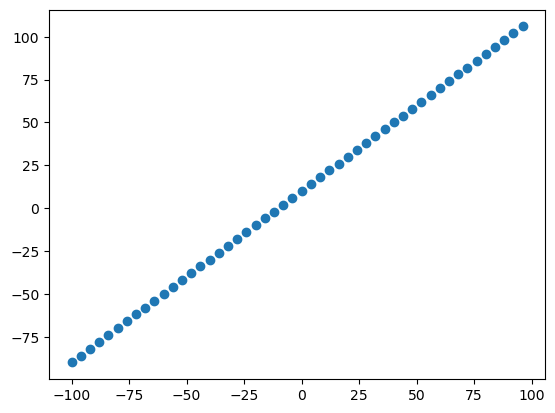

In [13]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(X,y)

the 3 sets are:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available and is only used once a model is completely trained (the model has never "seen" the data in the test set).


In [14]:
# split the dataset
# 80% training and 20% for testing

train=int(len(X) *0.75) # 75%
valid=train+int(len(X)*0.15) # 15 %

print(train,valid, )
x_train,y_train=X[0:train],y[:train]
# x_valid,y_valid=X[train:valid],y[train:valid]
x_test,y_test=X[train:],y[train:]

# len(x_train),len(x_test)
train

37 44


37

### Visualzing the data

Now we've got our data in training and test sets...let's visualize it again


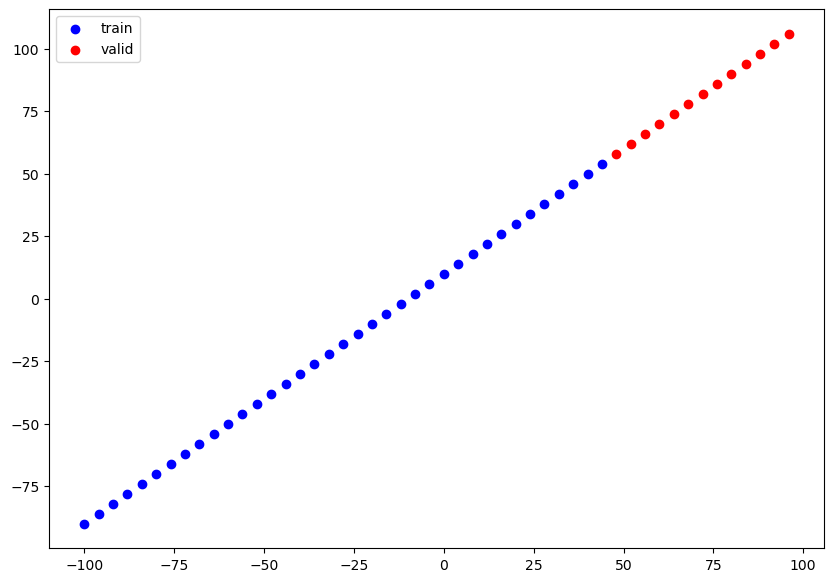

In [15]:
plt.figure(figsize=(10,7))

# plot train
plt.scatter(x_train,y_train,c="b",label="Traning data")

# plt.scatter(x_valid,y_valid,c="y",label="valid data")

plt.scatter(x_test,y_test,c="r",label="valid data")

plt.legend(["train","valid","test"])

In [16]:
# let build


# 1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile

model.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. Fit the model
# model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

In [17]:
# lets create the model which build automatically  by defining the input_shape

# 1. creat a model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)




In [18]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

* Total params - total number of parameters in the model.

* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [23]:
tf.expand_dims(x_train,axis=-1),y_train

(<tf.Tensor: shape=(37, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44]], dtype=int32)>,
 <tf.Tensor: shape=(37,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54], dtype=int32)>)

In [24]:
model.fit( tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=2)

Epoch 1/100
2/2 - 0s - loss: 44.0161 - mae: 44.0161 - 251ms/epoch - 126ms/step
Epoch 2/100
2/2 - 0s - loss: 31.6657 - mae: 31.6657 - 26ms/epoch - 13ms/step
Epoch 3/100
2/2 - 0s - loss: 19.4393 - mae: 19.4393 - 16ms/epoch - 8ms/step
Epoch 4/100
2/2 - 0s - loss: 8.7608 - mae: 8.7608 - 13ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 10.2288 - mae: 10.2288 - 13ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 11.6038 - mae: 11.6038 - 13ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 10.6201 - mae: 10.6201 - 16ms/epoch - 8ms/step
Epoch 8/100
2/2 - 0s - loss: 7.9988 - mae: 7.9988 - 13ms/epoch - 6ms/step
Epoch 9/100
2/2 - 0s - loss: 7.7778 - mae: 7.7778 - 12ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 9.9304 - mae: 9.9304 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 10.0713 - mae: 10.0713 - 15ms/epoch - 8ms/step
Epoch 12/100
2/2 - 0s - loss: 8.7021 - mae: 8.7021 - 14ms/epoch - 7ms/step
Epoch 13/100
2/2 - 0s - loss: 6.8880 - mae: 6.8880 - 11ms/epoch - 5ms/step
Epoch 14/100
2/2

In [25]:
model.predict(x_test)

1/1 [==============================] - 0s 43ms/step


array([[ 57.105354],
       [ 61.03902 ],
       [ 64.972694],
       [ 68.906364],
       [ 72.840034],
       [ 76.773705],
       [ 80.70736 ],
       [ 84.64103 ],
       [ 88.57469 ],
       [ 92.50836 ],
       [ 96.44203 ],
       [100.3757  ],
       [104.309364]], dtype=float32)

In [21]:
y_test

<tf.Tensor: shape=(13,), dtype=int32, numpy=
array([ 58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106],
      dtype=int32)>

In [26]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing our model's predictions

To visualize predictions,its  a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).


In [27]:
# make some predictions

y_preds=model.predict(x_test)
y_preds

1/1 [==============================] - 0s 18ms/step


array([[ 57.105354],
       [ 61.03902 ],
       [ 64.972694],
       [ 68.906364],
       [ 72.840034],
       [ 76.773705],
       [ 80.70736 ],
       [ 84.64103 ],
       [ 88.57469 ],
       [ 92.50836 ],
       [ 96.44203 ],
       [100.3757  ],
       [104.309364]], dtype=float32)

In [28]:
# Create a plot function to visualize y_preds and y_train

def plot_prediction(y_preds,train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test):
    plt.figure(figsize=(10,7))
    # plot train data
    plt.scatter(train_data,train_label,c="b",label="train data")
    # plot test data
    plt.scatter(test_data,test_label,c="g",label="train data")
    # plot model prediction vs actual
    plt.scatter(test_data,y_preds,c="r",label="predict data")

    plt.legend()

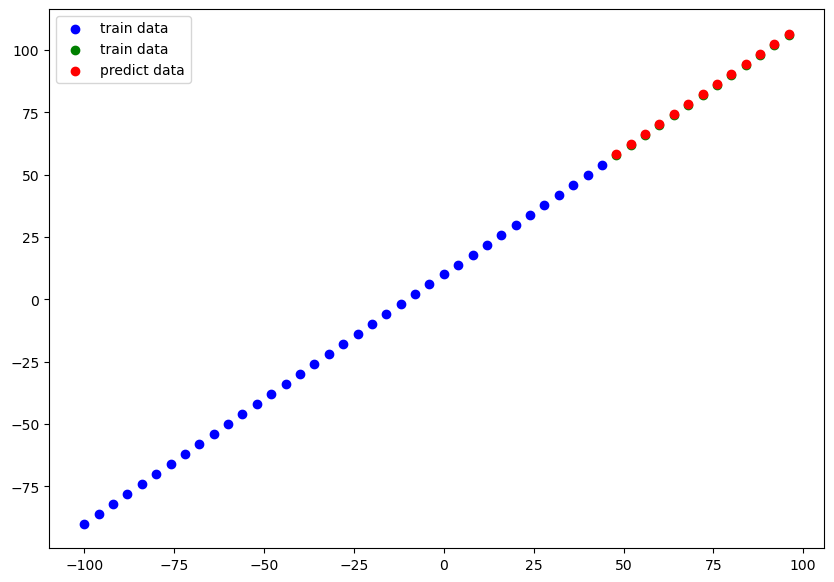

In [114]:
plot_prediction(y_preds=y_preds)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"

* **MSE** - mean square error, "square the average errors"



In [29]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 133ms/step - loss: 1.2926 - mae: 1.2926


[1.2926374673843384, 1.2926374673843384]

In [30]:
# want to squeez the y_pres so that our test and y_prdes are in same shape
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=1.2926375>

In [129]:
# Mean square erroe

tf.metrics.MSE(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=0.13696635>

In [32]:
def evaluate_model(y_true,y_preds):
    score={}
    score["MSE"]=tf.metrics.MSE(y_test,tf.squeeze(y_preds))
    score["MAE"]=tf.metrics.MAE(y_test,tf.squeeze(y_preds))

    return score


In [33]:
evaluate_model(y_train,y_preds)

{'MSE': <tf.Tensor: shape=(), dtype=float32, numpy=1.732512>,
 'MAE': <tf.Tensor: shape=(), dtype=float32, numpy=1.2926375>}

## Running   experiments to imporove the model

The main ways to imporove a deep model:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.

2. `model_2` - 2 layers, trained for 100 epochs.

3. `model_3` - 2 layers, trained for 500 epochs.


In [103]:
# model 1

tf.random.set_seed(42)

# 1. create the model

model_1=tf.keras.Sequential(
    [
    tf.keras.layers.Dense(1)
    ]
)

# 2. complie

model_1.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. fit the model

model_1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 34ms/step - loss: 78.6912 - mae: 78.6912
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 37.6228 - mae: 37.6228
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8169 - mae: 10.8169
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.1859 - mae: 14.1859
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4859 - mae: 19.4859
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 12.6822 - mae: 12.6822
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7165 - mae: 9.7165
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.4300 - mae: 12.4300
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 13.0280 - mae: 13.0280
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 7.7396 - mae: 7.7396
Epoch 11/100
2/2 [==============================] - 0s 6ms/s

In [104]:
# visualize
y_preds=model_1.predict(x_test)


1/1 [==============================] - 0s 31ms/step


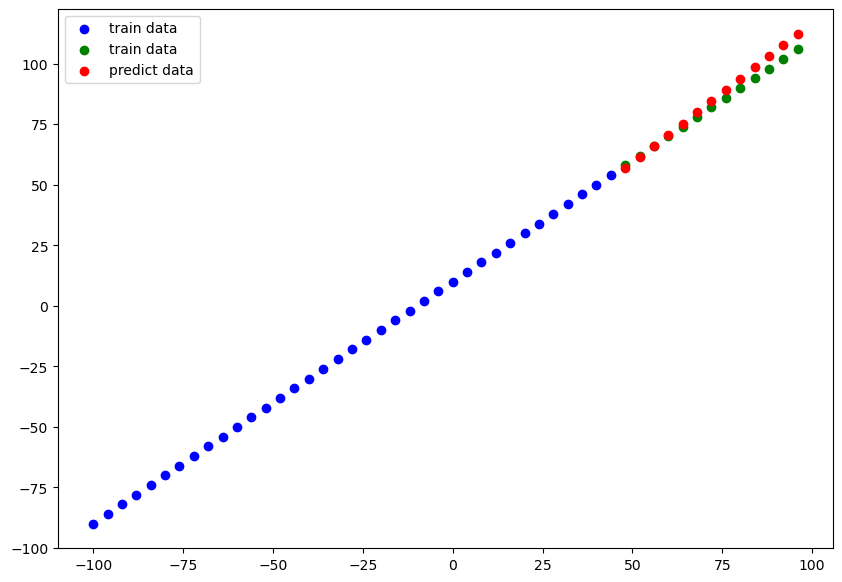

In [176]:
plot_prediction(y_preds=y_preds)

In [106]:
# Evaluate

result1=evaluate_model(y_test,y_preds)

**Build `Model 2`**

* 2 dense layers, trained for 100 epochs.

* `model_2` will be the same as `model_1` except it will have an extra layer with 10 hidden units.


In [107]:
# set random set
tf.random.set_seed(42)
# 1. building the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model_2.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mse"]
)

# 3. Fit the mode

model_2.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 39ms/step - loss: 38.7201 - mse: 2087.2649
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 70.1130 - mse: 7564.1016
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 6.9782 - mse: 73.0934
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 16.7839 - mse: 408.4539
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 23.4848 - mse: 840.3998
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0318 - mse: 135.2202
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 21.8136 - mse: 702.6801
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 18.0256 - mse: 476.1692
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3517 - mse: 167.4548
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 8.7832 - mse: 127.3009
Epoch 11/100
2/2 [==============================]

In [108]:

# visualize
y_preds2=model_2.predict(x_test)
y_preds2

1/1 [==============================] - 0s 29ms/step


array([[45.195683],
       [48.843742],
       [52.491806],
       [56.139874],
       [59.787937],
       [63.436   ],
       [67.08406 ],
       [70.732124],
       [74.38019 ],
       [78.02825 ],
       [81.67632 ],
       [85.32438 ],
       [88.97244 ]], dtype=float32)

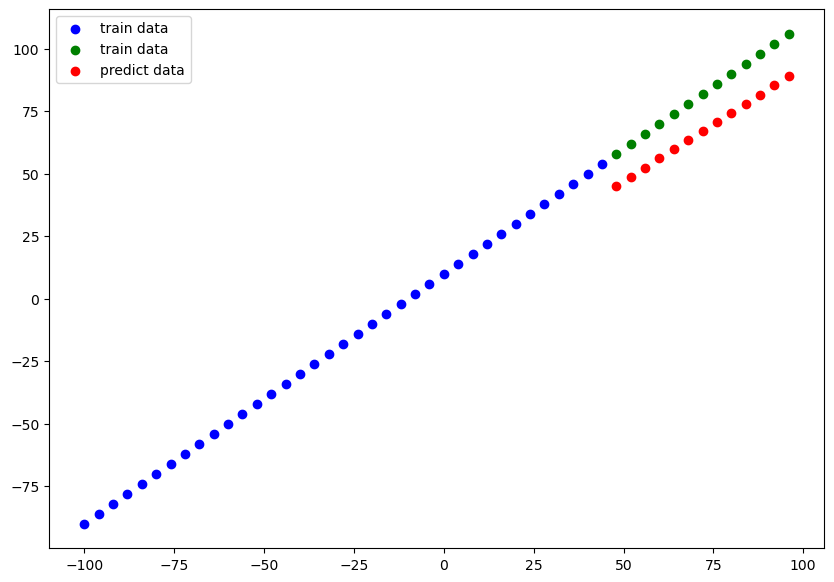

In [109]:
plot_prediction(y_preds=y_preds2)

In [110]:
result2=evaluate_model(y_test,y_preds2)

**Build `Model 3`**

* 2 dense layers, trained for 500 epochs.

In [124]:
# set random set
tf.random.set_seed(42)
# 1. building the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

model_3.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. Fit the mode

model_3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=500,verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 39ms/step - loss: 39.1688 - mae: 39.1688
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 67.6625 - mae: 67.6625
Epoch 3/500
2/2 [==============================] - 0s 38ms/step - loss: 13.8242 - mae: 13.8242
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 15.1705 - mae: 15.1705
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 22.4516 - mae: 22.4516
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 9.3979 - mae: 9.3979
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 20.6364 - mae: 20.6364
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 18.4672 - mae: 18.4672
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 10.9772 - mae: 10.9772
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 9.7673 - mae: 9.7673
Epoch 11/500
2/2 [==============================] - 0s 9ms

In [126]:
y_preds3=model_3.predict(x_test)
y_preds3

1/1 [==============================] - 0s 33ms/step


array([[ 66.129684],
       [ 71.11543 ],
       [ 76.10118 ],
       [ 81.08694 ],
       [ 86.07269 ],
       [ 91.05844 ],
       [ 96.04419 ],
       [101.02994 ],
       [106.015686],
       [111.00144 ],
       [115.9872  ],
       [120.972946],
       [125.958694]], dtype=float32)

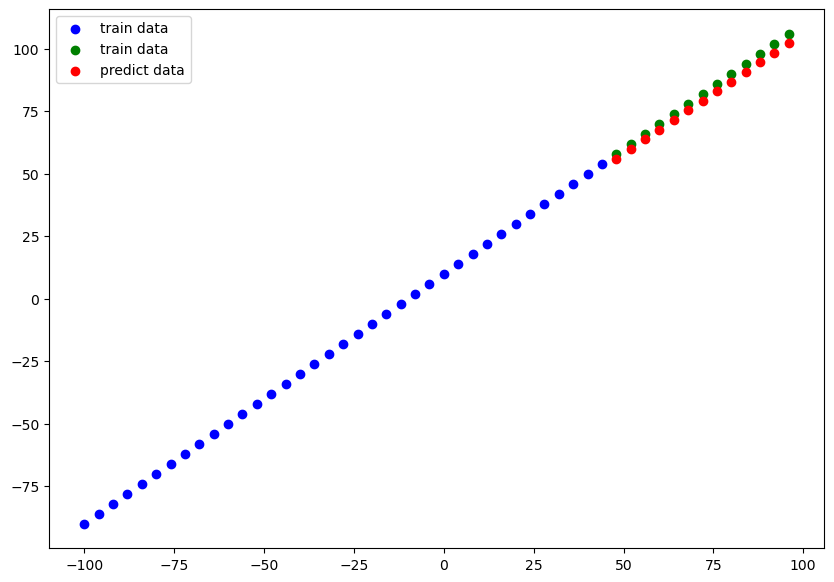

In [123]:
plot_prediction(y_preds3)

In [131]:
# Evaluation

result3=evaluate_model(y_test,y_preds)

# let compare the results of Three model

In [171]:
# plot everything

import seaborn as sn
import pandas as pd


df=pd.DataFrame(data=[result1,result2,result3])


In [174]:
# lets conver the df
df
df["MAE"]=[d.numpy() for d in df['MAE']]
df["MSE"]=[d.numpy() for d in df['MSE']]

<Axes: xlabel='models', ylabel='Scores'>

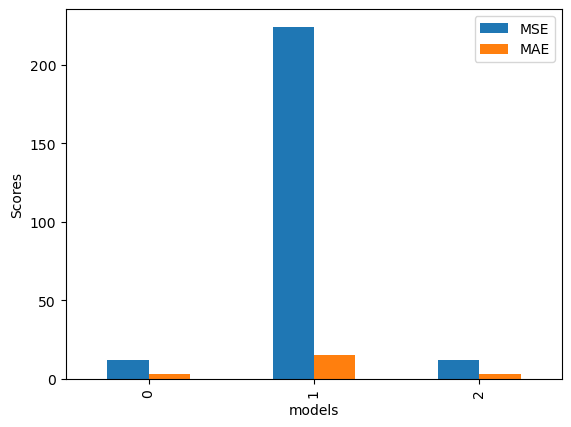

In [175]:
df.plot(kind="bar",xlabel="models",ylabel="Scores")